<a href="https://colab.research.google.com/github/IT22312976/25-26j--340/blob/main/25_26J_340.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install YOLOv8
!pip install ultralytics

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from ultralytics import YOLO
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DRIVE_FOLDER = '/content/drive/MyDrive/'
TRAINED_TWS_MODELS_FOLDER = os.path.join(DRIVE_FOLDER, 'data_lahiru_tws_detection/data')
TRAINED_ROAD_LANE_MODELS_FOLDER = os.path.join(DRIVE_FOLDER, 'data_sandeepa_wrong_overtake/saved_models')
TRAINED_NIGHT_TIME_DETECT_MODELS_FOLDER = os.path.join(DRIVE_FOLDER, 'data_vithya_night_time_animal_detection/data')
tws_model_path = os.path.join(TRAINED_TWS_MODELS_FOLDER, 'best_earphone_model.pt')
road_lane_model_path = os.path.join(TRAINED_ROAD_LANE_MODELS_FOLDER, 'road_line_detector_v1.pt')
night_time_animal_detect_model_path = os.path.join(TRAINED_NIGHT_TIME_DETECT_MODELS_FOLDER, 'best_animal_detector.pt')

In [ ]:
TEST_FOLDER_NIGHT_ANIMAL = os.path.join(DRIVE_FOLDER, '25-26J-340/data/night_time_animals')
TEST_FOLDER_ROAD_LANE = os.path.join(DRIVE_FOLDER, '25-26J-340/data/road_lane')
TEST_FOLDER_TWS_DATA = os.path.join(DRIVE_FOLDER, '25-26J-340/data/tws_data')

In [ ]:
def detect_image(model_input, image_path, conf_threshold=0.25):
    """
    Runs YOLO prediction on a specific image path and displays the result.

    Args:
        model_input (str or YOLO): Path to the .pt file OR a loaded YOLO model object.
        image_path (str): Path to the image file.
        conf_threshold (float): Confidence threshold for detection.
    """
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        return

    # Load model if a string path is provided, otherwise use the object directly
    if isinstance(model_input, str):
        model = YOLO(model_input)
    else:
        model = model_input

    # Run prediction
    results = model.predict(source=image_path, conf=conf_threshold)

    # Display results
    for result in results:
        # Plot predictions (returns a BGR numpy array)
        im_array = result.plot()

        # Convert BGR (OpenCV default) to RGB (Matplotlib default)
        im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)

        # Show the image
        plt.figure(figsize=(10, 10))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.title(f"Prediction: {os.path.basename(image_path)}")
        plt.show()

In [ ]:
tws_test_path = os.path.join(TEST_FOLDER_TWS_DATA, '123.jpg')


image 1/1 /content/drive/MyDrive/25-26J-340/data/tws_data/123.jpg: 448x640 1 earphone, 12.7ms
Speed: 3.3ms preprocess, 12.7ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


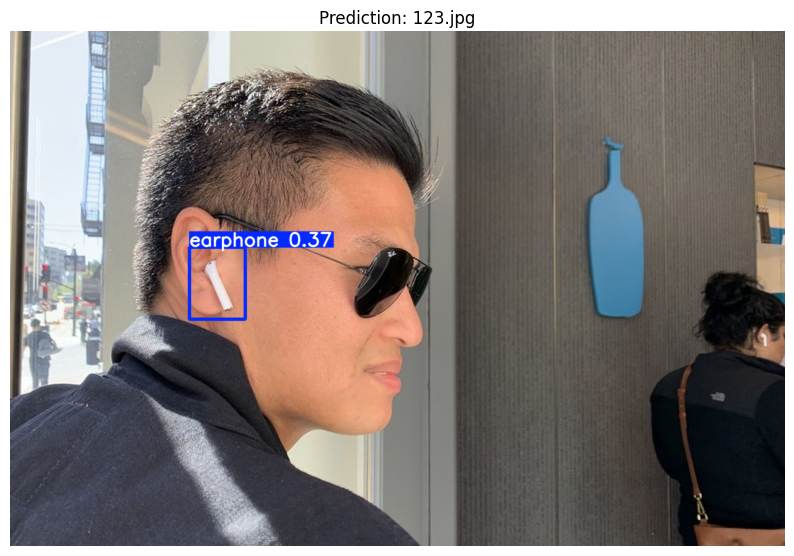

In [ ]:
detect_image(tws_model_path, tws_test_path)

In [ ]:
road_lane_test_path = os.path.join(TEST_FOLDER_ROAD_LANE, '12.jpg')


image 1/1 /content/drive/MyDrive/25-26J-340/data/road_lane/12.jpg: 384x640 3 dotted-lines, 1 solid-line, 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


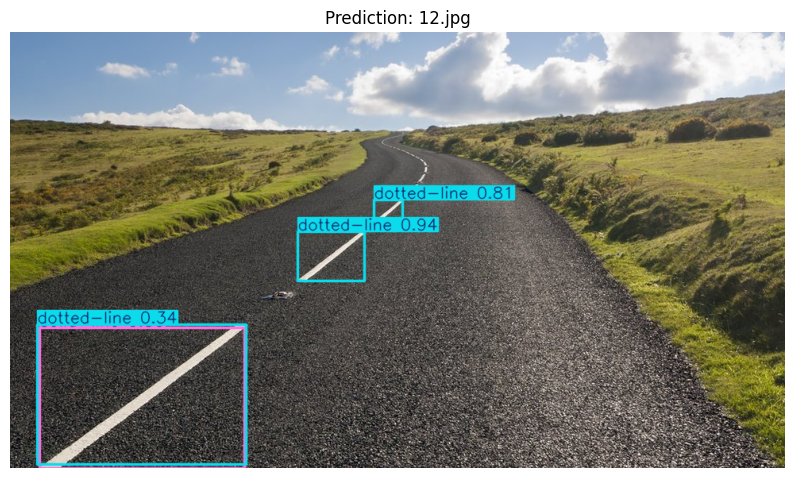

In [ ]:
detect_image(road_lane_model_path, road_lane_test_path)

In [ ]:
night_time_animal_detect_test_path = os.path.join(TEST_FOLDER_NIGHT_ANIMAL, 'tiger.jpg')


image 1/1 /content/drive/MyDrive/25-26J-340/data/night_time_animals/tiger.jpg: 448x640 2 Leopards, 12.2ms
Speed: 2.4ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


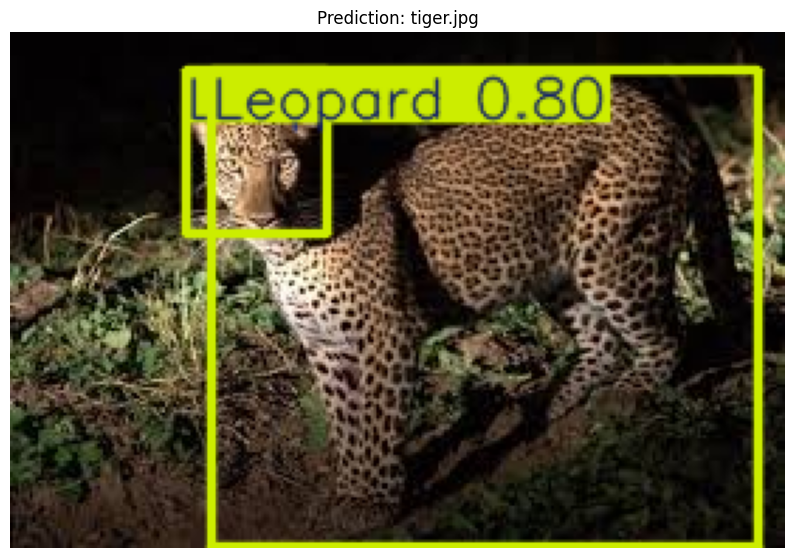

In [ ]:
detect_image(night_time_animal_detect_model_path, night_time_animal_detect_test_path)